# Assignment 2 - Into to Statistical machine Learning

### [Data Exploration](#Data-exploration)
### [Decision stump](#Decision-Stump)
### [AdaBoost classifier](#AdaBoost-Classifier)
### [AdaBoost Sklearn](#Sklearn-AdaBoost)
### [SVM-SVC](#SVM)




### Data exploration


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('wdbc_data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Shape
df.shape

(569, 32)

In [4]:
# Check any null data
df.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

In [5]:
# Describe the dataset
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Changing target values to 1 and -1

In [6]:
#We would not need an ID number and therefore we can drop it
del df[0]

In [7]:
# Changing M to -1 and B to 1
df[1] = df[1].replace('M',-1)
df[1] = df[1].replace('B',1)

In [8]:
# Check the dataframe
df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Split data

In [9]:
# Split data 0-300 is train, 300-435 is test 435-569 is valid
df_train = df[0:300]
df_test = df[300:435]
df_val = df[435:569]

In [10]:
print('Train shape', df_train.shape)
print('Validation shape', df_val.shape)
print('Test shape', df_test.shape)

Train shape (300, 31)
Validation shape (134, 31)
Test shape (135, 31)


In [11]:
# Assign x and y values
y_train = df_train.iloc[:,0]
x_train = df_train.iloc[:,1:31]
y_valid = df_val.iloc[:,0]
x_valid = df_val.iloc[:,1:31]
y_test = df_test.iloc[:,0]
x_test = df_test.iloc[:,1:31]


In [12]:
x_train = np.array(x_train, dtype=int)
y_train = np.array(y_train, dtype=int)
x_test = np.array(x_test, dtype=int)
y_test = np.array(y_test, dtype=int)
x_valid = np.array(x_valid, dtype=int)
y_valid = np.array(y_valid, dtype=int)

In [13]:
print(x_train)

[[ 17  10 122 ...   0   0   0]
 [ 20  17 132 ...   0   0   0]
 [ 19  21 130 ...   0   0   0]
 ...
 [ 11  18  75 ...   0   0   0]
 [ 14  18  91 ...   0   0   0]
 [ 10  23  66 ...   0   0   0]]


### Decision Stump

In [14]:
class stump():
    def __init__(self):
        self.w = {}
        self.x0 = {}
        self.s = {}
        self.d_f = 0
        self.d_t = 0
        
    def predict(self, x):
        c_f = self.d_f
        thresh = self.x0[c_f]
        y_pred = np.ones((len(x),1))
        i = np.where(x[:, c_f]< thresh)
        y_pred[i] = -1
        y_pred = self.s[c_f]* y_pred
        return y_pred
    
    def fit(self, x, y, w):
        d = x.shape[1]
        z = np.sum(w)
        w = w/z
        we = np.zeros((d,1))
        for i in range(d):
            we[i] = self.one_dim(x[:, i], y, w,i)
        self.d_f = np.argmin(we)
        self.d_t = self.x0[self.d_f]
        return self.d_f
    
    def one_dim(self, x1, y1, w1, n):
        x = x1.reshape(-1).copy()
        y = y1.reshape(-1).copy()
        w = w1.reshape(-1).copy()
        idx = np.argsort(x)
        idx_rev = idx[::-1]
        xs = x[idx].copy()
        
        ls = np.cumsum(w[idx] * y[idx]) #left to right sums
        rs = np.cumsum(w[idx_rev] * y[idx_rev]) #right to left sums
        sc = -ls[:-1] + rs[-2::-1]
        #find distinguishable points(possible boundary locations)
        ix = np.where(xs[:-1] < xs[1:])
        ix = ix[0]
        #locate the boundary or give up
        if len(ix)>0 :
            abs_sc = np.abs(sc[ix])
            max_i = np.argmax(abs_sc)
            max_sc = abs_sc[max_i]
            ind = ix[max_i]
            self.w[n] = 0.5 - 0.5 * max_sc #weighted error
            self.x0[n] = (xs[ind] + xs[ind+1])/2 # threshold
            self.s[n] = np.sign(sc[ind]) #direction of -1 ->1 change
        else:
            self.w[n] = 0.5
            self.x0[n] = 0
            self.s[n] = 1
        return self.w[n]

### AdaBoost Classifier

In [15]:
class AdaBoostC():
    def __init__(self):
        self.weak={}
        self.alpha={}
        self.len_model=0

    def get_alpha(self):
        return self.alpha

    def predict(self,X):
        ret=np.array([0.0]*len(X))
        for j in range(self.len_model):
            sub_model_pred = self.weak[j].predict(X)
            sub_model_pred = sub_model_pred.reshape(-1)
            ret += self.alpha[j]*sub_model_pred
        return np.sign(ret)

    #update alpha 
    def update_alpha(self,e):
        if e==0:
            return 10000
        elif e==0.5:
            return 0.001
        else:
            return 0.5*np.log((1-e)/e)

    # error
    def get_e(self,y,pred,W):
        ret=0
        for i in range(len(y)):
            if y[i]!=pred[i]:
                ret+=W[i]
        return ret

    # update weight 
    def get_W(self,W,alpha,y,pred):
        ret=0
        new_W=[]
        for i in range(len(y)):
            new_W.append(W[i]*np.exp(-alpha*y[i]*pred[i]))
        return np.array(new_W/sum(new_W)).reshape([len(y),1])

    #final error
    def cal_final_e(self,y,whole_predict):
        ret = 0
        for i in range(len(y)):
            if whole_predict[i] != y[i]:
                ret = ret+1
        return ret/len(y)

    def evaluate(self, y_real, y_pred):
        total_num = len(y_real)
        error_num = np.sum(y_real != y_pred)
        return error_num/total_num
    # Fit
    def fit(self, X, y, x_test=None, y_test=None, epochs=4):
        W={}
        alpha={}
        pred={}
        train_loss=[]
        test_loss=[]

        for i in range(epochs):
            if i == 0:
                W[i]=np.array([1]*len(y))/len(y)
                W[i]=W[i].reshape([len(y),1])
            else:
                W[i]=self.get_W(W[i-1],alpha[i-1],y,pred[i-1])

            #fit decision stump
            self.weak[i] = stump()
            self.weak[i].fit(X,y,W[i])
            pred[i]=self.weak[i].predict(X)

            #error rate and update alpha
            error=self.get_e(y,pred[i],W[i])
            alpha[i]=self.update_alpha(error)

            self.alpha = alpha
            self.len_model = i + 1

            whole_predict = self.predict(X)
            final_error = self.cal_final_e(y, whole_predict)
            train_loss.append(final_error)

            if x_test is not None:
                test_pred = self.predict(x_test)
                test_error = self.cal_final_e(y_test, test_pred)
                test_loss.append(test_error)
                print("epoch: ", i+1, " train loss:  ", final_error, " loss:  ", test_error)
            else:
                print("epoch: ", i + 1, " train loss:  ", final_error)

        # return week classifier number
        return self.len_model,train_loss,test_loss




#### AdaBoost on validation set

epoch:  1  train loss:   0.08  loss:   0.09701492537313433
epoch:  2  train loss:   0.08  loss:   0.09701492537313433
epoch:  3  train loss:   0.08  loss:   0.09701492537313433
epoch:  4  train loss:   0.08  loss:   0.09701492537313433
epoch:  5  train loss:   0.07666666666666666  loss:   0.05970149253731343
epoch:  6  train loss:   0.07  loss:   0.12686567164179105
epoch:  7  train loss:   0.06  loss:   0.09701492537313433
epoch:  8  train loss:   0.05333333333333334  loss:   0.09701492537313433
epoch:  9  train loss:   0.056666666666666664  loss:   0.09701492537313433
epoch:  10  train loss:   0.056666666666666664  loss:   0.11940298507462686
epoch:  11  train loss:   0.056666666666666664  loss:   0.09701492537313433
epoch:  12  train loss:   0.05333333333333334  loss:   0.11940298507462686
epoch:  13  train loss:   0.043333333333333335  loss:   0.05970149253731343
epoch:  14  train loss:   0.043333333333333335  loss:   0.08208955223880597
epoch:  15  train loss:   0.0433333333333333

epoch:  129  train loss:   0.0  loss:   0.06716417910447761
epoch:  130  train loss:   0.0  loss:   0.05970149253731343
epoch:  131  train loss:   0.0  loss:   0.06716417910447761
epoch:  132  train loss:   0.0  loss:   0.05970149253731343
epoch:  133  train loss:   0.0  loss:   0.05970149253731343
epoch:  134  train loss:   0.0  loss:   0.05970149253731343
epoch:  135  train loss:   0.0  loss:   0.05970149253731343
epoch:  136  train loss:   0.0  loss:   0.05970149253731343
epoch:  137  train loss:   0.0  loss:   0.05970149253731343
epoch:  138  train loss:   0.0  loss:   0.05970149253731343
epoch:  139  train loss:   0.0  loss:   0.05970149253731343
epoch:  140  train loss:   0.0  loss:   0.05970149253731343
epoch:  141  train loss:   0.0  loss:   0.05970149253731343
epoch:  142  train loss:   0.0  loss:   0.05970149253731343
epoch:  143  train loss:   0.0  loss:   0.05970149253731343
epoch:  144  train loss:   0.0  loss:   0.05970149253731343
epoch:  145  train loss:   0.0  loss:   

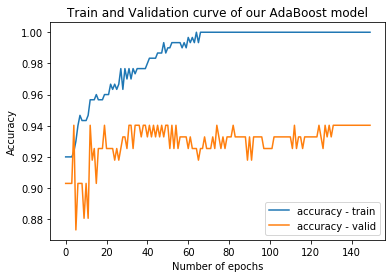

train accuracy  100.0 %
validation accuracy: 94.02985074626866 %


In [16]:
clf = AdaBoostC()
train_step, train_loss, test_loss = clf.fit(x_train, y_train, x_valid, y_valid, epochs=150)
print('train_step = ', train_step)
train_acc = 1-np.array(train_loss)
test_acc = 1-np.array(test_loss)
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['accuracy - train', 'accuracy - valid'])
plt.title('Train and Validation curve of our AdaBoost model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

# Results
pred_train = clf.predict(x_train)
err_train = clf.evaluate(pred_train, y_train)
print('train accuracy ',(1 - err_train) * 100,'%')
pred_valid = clf.predict(x_valid)
err_valid = clf.evaluate(pred_valid, y_valid)
print('validation accuracy:',(1 - err_valid) * 100,'%')


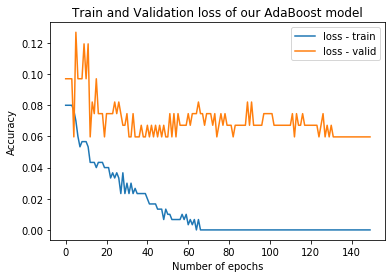

In [17]:
# Loss graph
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['loss - train', 'loss - valid'])
plt.title('Train and Validation loss of our AdaBoost model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

#### AdaBoost on Test set

epoch:  1  train loss:   0.08  loss:   0.06666666666666667
epoch:  2  train loss:   0.08  loss:   0.06666666666666667
epoch:  3  train loss:   0.08  loss:   0.06666666666666667
epoch:  4  train loss:   0.08  loss:   0.06666666666666667
epoch:  5  train loss:   0.07666666666666666  loss:   0.02962962962962963
epoch:  6  train loss:   0.07  loss:   0.05185185185185185
epoch:  7  train loss:   0.06  loss:   0.037037037037037035
epoch:  8  train loss:   0.05333333333333334  loss:   0.044444444444444446
epoch:  9  train loss:   0.056666666666666664  loss:   0.044444444444444446
epoch:  10  train loss:   0.056666666666666664  loss:   0.05925925925925926
epoch:  11  train loss:   0.056666666666666664  loss:   0.044444444444444446
epoch:  12  train loss:   0.05333333333333334  loss:   0.05925925925925926
epoch:  13  train loss:   0.043333333333333335  loss:   0.037037037037037035
epoch:  14  train loss:   0.043333333333333335  loss:   0.05185185185185185
epoch:  15  train loss:   0.04333333333

epoch:  127  train loss:   0.0  loss:   0.02962962962962963
epoch:  128  train loss:   0.0  loss:   0.02962962962962963
epoch:  129  train loss:   0.0  loss:   0.02962962962962963
epoch:  130  train loss:   0.0  loss:   0.02962962962962963
epoch:  131  train loss:   0.0  loss:   0.02962962962962963
epoch:  132  train loss:   0.0  loss:   0.02962962962962963
epoch:  133  train loss:   0.0  loss:   0.02962962962962963
epoch:  134  train loss:   0.0  loss:   0.02962962962962963
epoch:  135  train loss:   0.0  loss:   0.02962962962962963
epoch:  136  train loss:   0.0  loss:   0.02962962962962963
epoch:  137  train loss:   0.0  loss:   0.02962962962962963
epoch:  138  train loss:   0.0  loss:   0.02962962962962963
epoch:  139  train loss:   0.0  loss:   0.02962962962962963
epoch:  140  train loss:   0.0  loss:   0.02962962962962963
epoch:  141  train loss:   0.0  loss:   0.02962962962962963
epoch:  142  train loss:   0.0  loss:   0.02962962962962963
epoch:  143  train loss:   0.0  loss:   

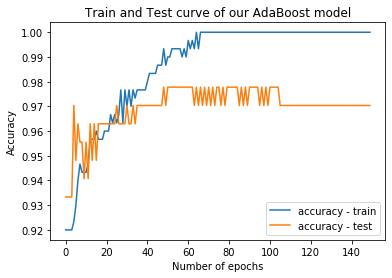

train accuracy  100.0 %
validation accuracy: 97.03703703703704 %


In [18]:
clf = AdaBoostC()
train_step, train_loss, test_loss = clf.fit(x_train, y_train, x_test, y_test, epochs=150)
print('train_step = ', train_step)
train_acc = 1-np.array(train_loss)
test_acc = 1-np.array(test_loss)
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['accuracy - train', 'accuracy - test'])
plt.title('Train and Test curve of our AdaBoost model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

# Results
pred_train = clf.predict(x_train)
err_train = clf.evaluate(pred_train, y_train)
print('train accuracy ',(1 - err_train) * 100,'%')
pred_test = clf.predict(x_test)
err_test = clf.evaluate(pred_test, y_test)
print('validation accuracy:',(1 - err_test) * 100,'%')

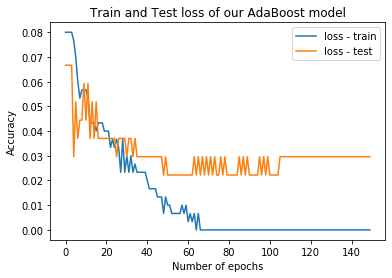

In [19]:
# Loss graph
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['loss - train', 'loss - test'])
plt.title('Train and Test loss of our AdaBoost model')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

### Sklearn AdaBoost

In [20]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import random
from sklearn.tree import DecisionTreeClassifier

#### Before Fine tuning

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# compare with the sklearn AdaBoostClassifier
clf_sk = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

pred = clf.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, pred))


clf_sk.fit(x_train, y_train)
y_pred_sk = clf_sk.predict(x_valid)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_sk))

Accuracy: 1.0
Accuracy: 0.9104477611940298


#### After Fine tuning

In [22]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": list(range(1,200))
             }


DTC = DecisionTreeClassifier(random_state = 0, max_depth = 1)

Ada = AdaBoostClassifier(random_state = 0, base_estimator = DTC)

# run grid search
grid_search_Ada = GridSearchCV(Ada, param_grid=param_grid, scoring = 'roc_auc', cv=3)
grid_search_Ada.fit(x_train, y_train)
print('best parameters',grid_search_Ada.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameters {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 195}


In [23]:
DTC = DecisionTreeClassifier(random_state = 0, criterion='gini',  
                             splitter='best', max_depth = 1)
Ada = AdaBoostClassifier(base_estimator = DTC,  n_estimators=195)

Ada.fit(x_train, y_train)
pred = Ada.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, pred))
Ada.fit(x_train, y_train)
y_pred_sk = Ada.predict(x_valid)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_sk))

Accuracy: 1.0
Accuracy: 0.9253731343283582


In [24]:
y_pred_sk = Ada.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sk))

Accuracy: 0.9703703703703703


### SVM

#### Before fine tuning

In [25]:
# compare with sklearn SVM
svm_clf = svm.SVC(gamma='scale',kernel='rbf')
svm_clf.fit(x_train, y_train)
pred_train = svm_clf.predict(x_train)
pred_train = np.array(pred_train)
err_train = clf.evaluate(pred_train,y_train )
print('sklearn SVM train accuracy:',(1 - err_train) *100,'%')

sklearn SVM train accuracy: 90.0 %


In [26]:
np.random.seed(0)
params_grids={'PCA__n_components':list(range(1,10)),
             'SVC__C':[0.0001,0.001,0.01,0.1,1,10],
             'SVC__gamma':[0.001,0.01,0.1,1,10,100],
             'SVC__kernel':['linear','rbf']}

In [27]:
pipe_svc = Pipeline(steps=[('PCA',PCA(n_components=2)),
                            ('SS',StandardScaler()),
                            ('SVC',SVC())])
#Train the model 
pipe_svc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = pipe_svc.predict(x_train)

rmse_svc = np.sqrt(metrics.mean_squared_error(y_train, y_pred_svc))
print(rmse_svc)
y_pred_svc = clf_sk.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_svc))

0.5163977794943222
Accuracy: 1.0


In [28]:
y_pred_svc = clf_sk.predict(x_test)
print("sklearn train Accuracy after scaling:",metrics.accuracy_score(y_test, y_pred_svc))

sklearn train Accuracy after scaling: 0.9481481481481482


In [29]:
#Searching for the optimal from param_grid
grid = GridSearchCV(pipe_svc, params_grids, cv=5,scoring='neg_mean_squared_error')# cv determines the cross-validation splitting
grid.fit(x_train, y_train)
print('best parameters',grid.best_params_)

best parameters {'PCA__n_components': 4, 'SVC__C': 1, 'SVC__gamma': 1, 'SVC__kernel': 'rbf'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Final SVC after fine tuning

In [30]:
#Create a pipeline
pipe_svc=Pipeline(steps=[('PCA',PCA(n_components=grid.best_params_['PCA__n_components'])),
                            ('SS',StandardScaler()),
                            ('SVC',SVC(C=grid.best_params_['SVC__C'],
                            gamma=grid.best_params_['SVC__gamma'], kernel=grid.best_params_['SVC__kernel']))])
#Train the model 
pipe_svc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = pipe_svc.predict(x_train)

rmse_svc = np.sqrt(metrics.mean_squared_error(y_train, y_pred_svc))
print(rmse_svc)
y_pred_svc = pipe_svc.predict(x_test)
print("sklearn train Accuracy after scaling and fine tuning:",metrics.accuracy_score(y_test, y_pred_svc))

0.32659863237109044
sklearn train Accuracy after scaling and fine tuning: 0.9555555555555556


## End